This code imports the nessasary librarys needed for this project.Then it reads a CSV file named "players_22.csv" into a pandas DataFrame called data and finally opens a JSON file named "vorakakan.json" in read mode and loads its content into a Python dictionary called jsonObj.

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from category_encoders import TargetEncoder
import json
import pandas as pd
import numpy as np
data = pd.read_csv("players_22.csv")


with open("vorakakan.json", "r") as file:
    jsonObj = json.load(file)


C:\Users\Davit\AppData\Local\Temp\ipykernel_8800\3004049581.py:9: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("players_22.csv")


This line generates descriptive statistics of the data in the DataFrame data, such as count, mean, standard deviation, etc.

In [11]:
data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


This line displays the first few rows of the DataFrame data.

In [12]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


This line displays the last few rows of the DataFrame data.

In [13]:
data.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,...,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


This line calculates and prints the number of missing values for each column in the DataFrame data.

In [14]:
print(data.isnull().sum())

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64


This code firstly selects columns from the DataFrame data based on the keys specified in the stats field of the JSON object loaded earlier ,then converts the selected data to numeric format, coercing invalid parsing to NaN. Calculates the correlation matrix of the selected data using the .corr() method of pandas DataFrames.Creates a new figure with a specified size for the upcoming plot.displays the correlation matrix as an image with a specified colormap ('coolwarm') and interpolation method ('nearest').Adds a color bar to the plot with a label indicating the meaning of the colors.Sets the ticks (labels) for the x and y axes of the plot, using the column names of the correlation matrix and lastly sets the title of the plot.

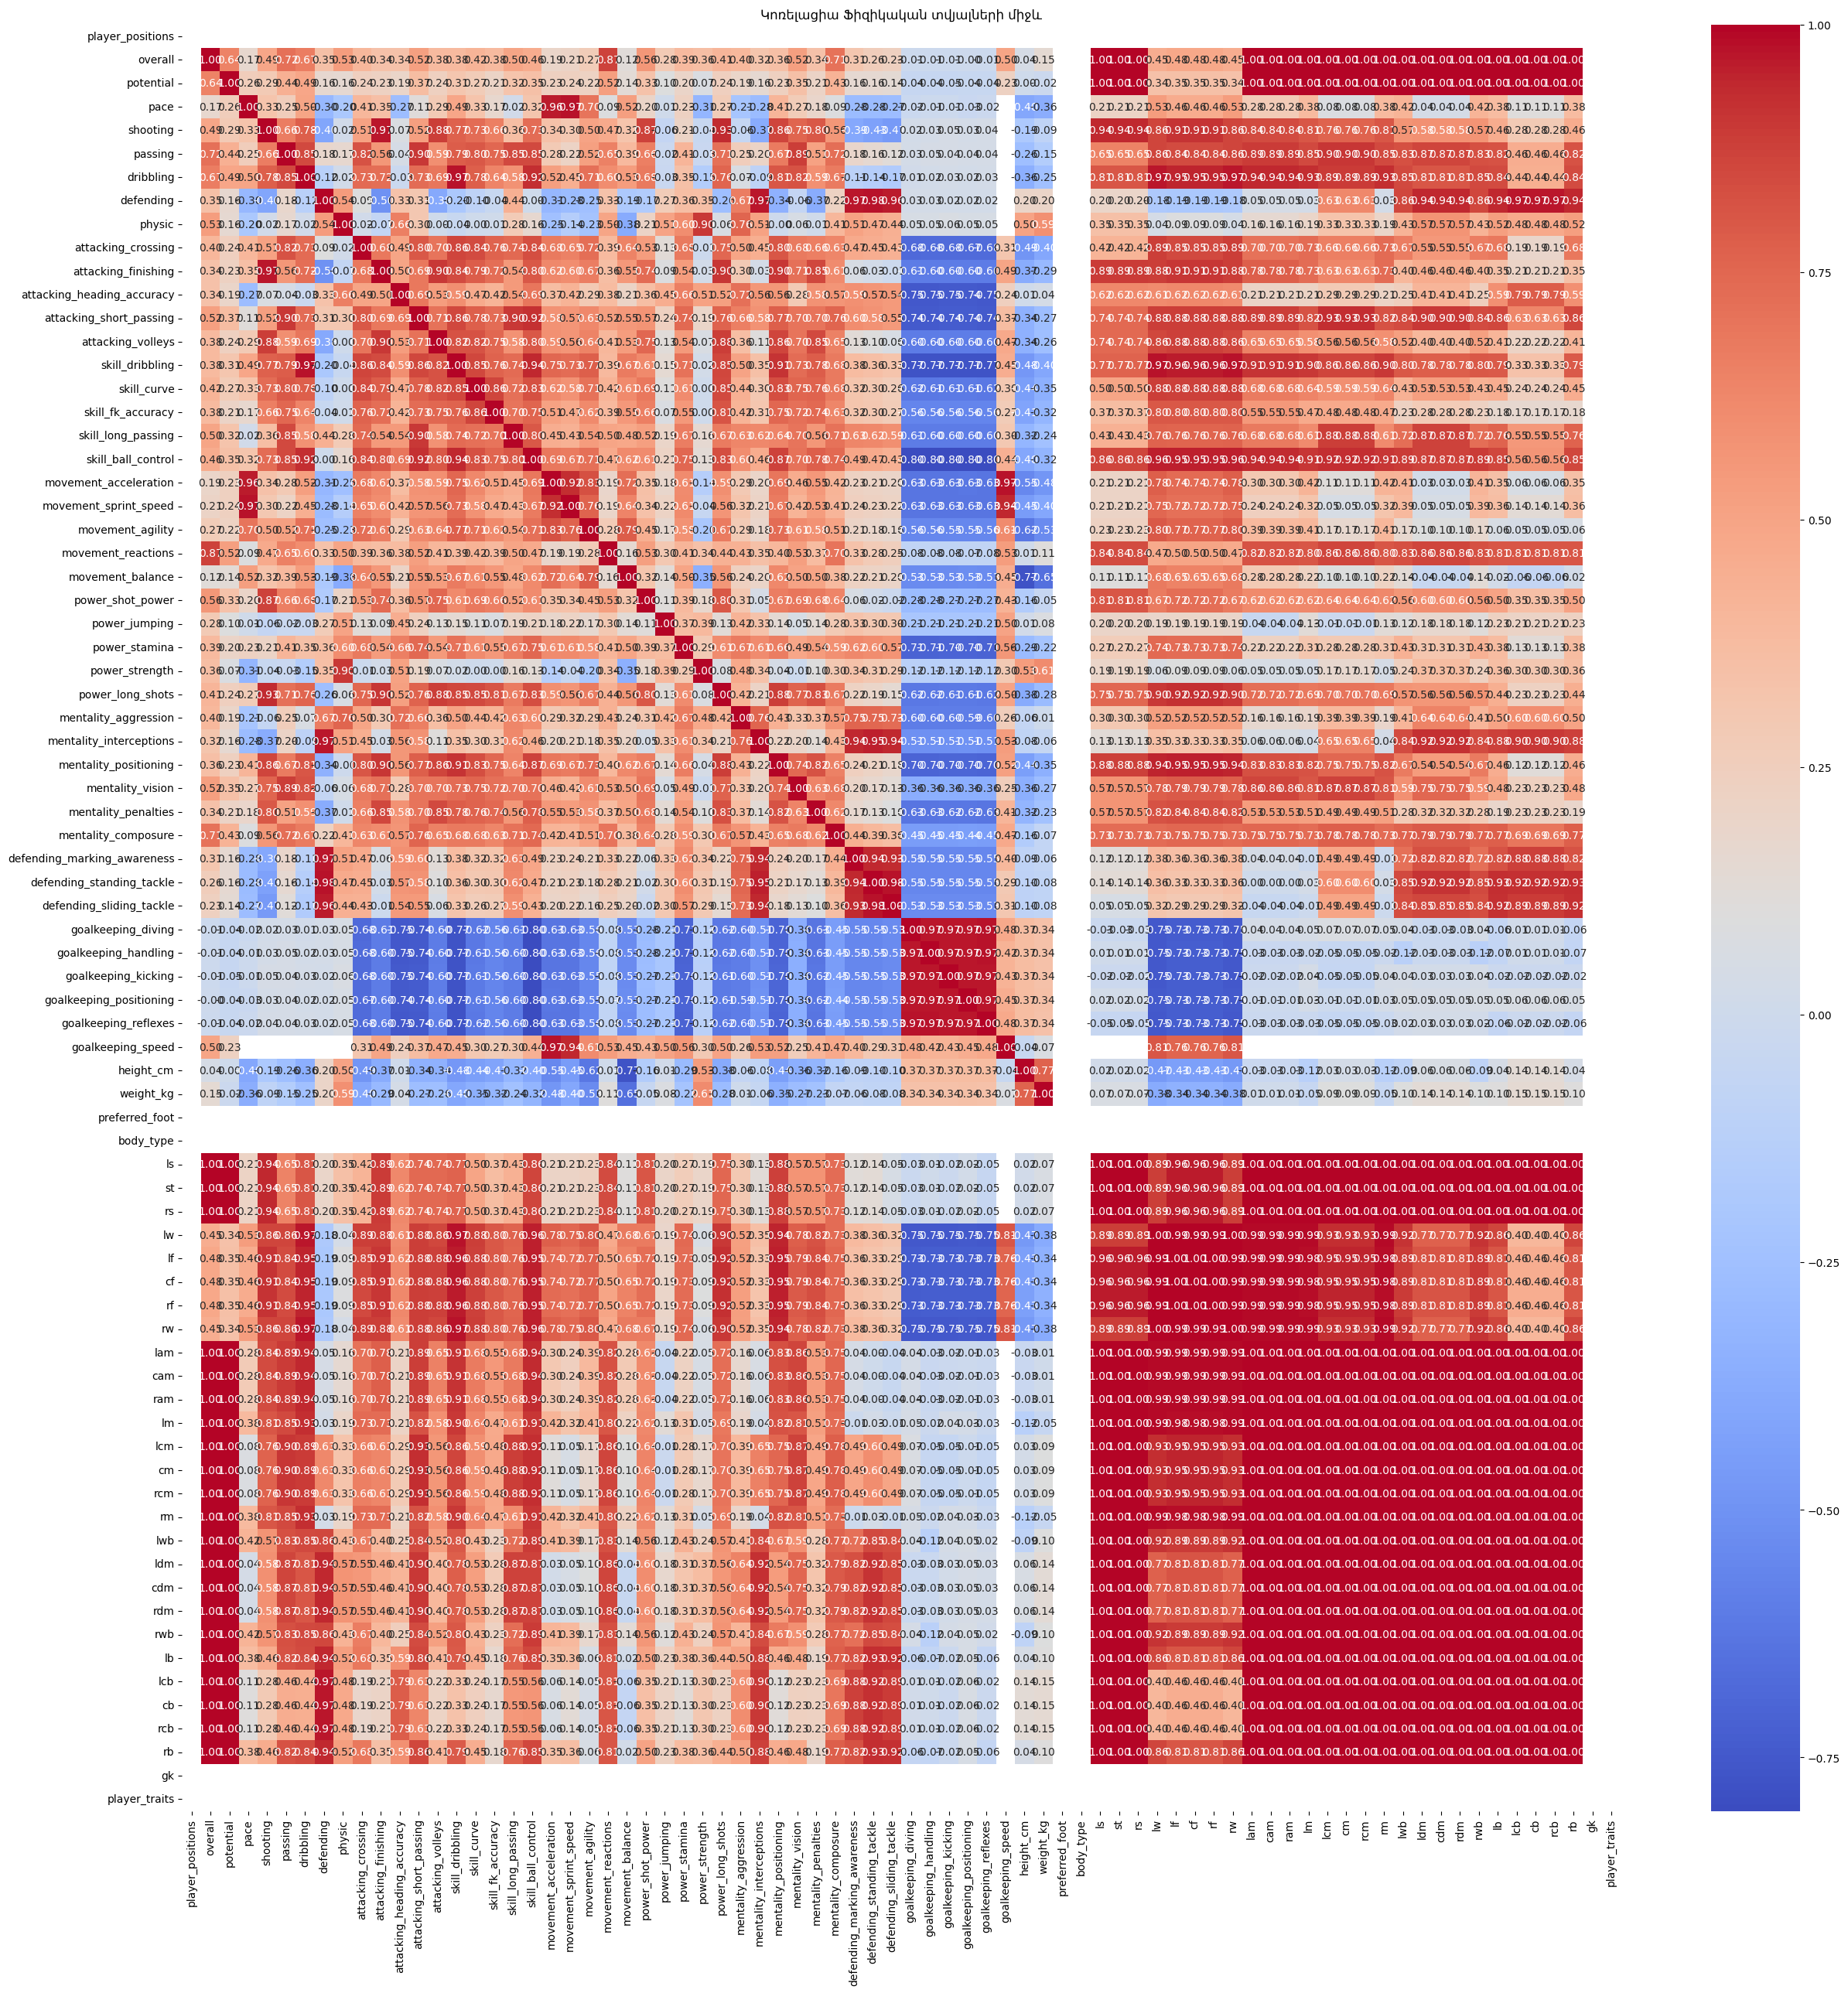

In [15]:
selected_data = data[jsonObj['stats']]
selected_data = selected_data.apply(pd.to_numeric, errors='coerce')
corr_matrix = selected_data.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Կոռելացիա Ֆիզիկական տվյալների միջև')
plt.show()

This block of code combines selected features from different categories specified in the jsonObj dictionary into a single list named selected_features. It splits the data into features (X) and the target variable (y). Features are selected based on the selected_features list, and the target variable is set to the overall player ratings. Identifies categorical and numerical features in the feature set X by checking their data types. Categorical features are stored in the list categorical_features, and numerical features are stored in the list numeric_features. Performs target encoding on high-cardinality categorical variables in the feature set X. Target encoding replaces categorical values with the mean of the target variable, which can help improve model performance.Splits the feature and target data into training and testing sets. The random_state parameter ensures reproducibility of the split.  Trains a RandomForestRegressor model and evaluates the trained model's accuracy on the testing set and prints the result.

In [16]:
selected_features = []
for category, features in jsonObj.items():
    selected_features.extend(features)

X = data[selected_features]
y = data['overall']

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

target_encoder = TargetEncoder()
X[categorical_features] = target_encoder.fit_transform(X[categorical_features], y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Model accuracy on the test set:", accuracy)


Model accuracy on the test set: 0.999941592919769


Firstly this code uses the trained RandomForestRegressor model to predict overall player ratings (predicted_overall) based on the feature set X then calculates the difference between predicted overall ratings and actual overall ratings, storing the differences in the rating_difference variable.It creates a pandas DataFrame named player_ratings_diff to store player information, including their names, predicted overall ratings, actual overall ratings, and rating differences. Players in the player_ratings_diff DataFrame get sorted based on their rating differences. The most underrated players are those with the highest positive rating differences, while the most overrated players are those with the highest negative rating differences. The .head(10) method selects the top 10 players in each category and lastly it print out the most underrated and overrated players based on the rating differences.

In [17]:
predicted_overall = model.predict(X)

rating_difference = predicted_overall - y.values

player_ratings_diff = pd.DataFrame({
    'Name': data['short_name'],
    'Predicted Overall': predicted_overall,
    'Actual Overall': y.values,
    'Rating Difference': rating_difference
})

most_underrated = player_ratings_diff.sort_values(by='Rating Difference', ascending=False).head(10)
most_overrated = player_ratings_diff.sort_values(by='Rating Difference').head(10)

print("Most Underrated Players:")
print(most_underrated)

print("\nMost Overrated Players:")
print(most_overrated)


Most Underrated Players:
              Name  Predicted Overall  Actual Overall  Rating Difference
19006     A. Jones              50.28              50               0.28
15677    G. Mensah              60.23              60               0.23
8895      S. Savić              66.22              66               0.22
7768      R. James              67.21              67               0.21
17633  P. Martinez              56.13              56               0.13
3        Neymar Jr              91.09              91               0.09
2587     L. Krejčí              73.08              73               0.08
12278     Li Shuai              63.07              63               0.07
10        N. Kanté              90.07              90               0.07
13567     Liu Yang              62.05              62               0.05

Most Overrated Players:
                 Name  Predicted Overall  Actual Overall  Rating Difference
115          S. Savić              81.69              84              -